In [169]:
# importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# Uploading File
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Practice/loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [120]:
#checking shape
df.shape

(614, 13)

In [121]:
# looking for null values in Dataset
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [122]:
# Looking total no. of null values in dataset
df.isnull().sum().sum()

np.int64(149)

In [123]:
# looking column wise null values
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [124]:
# % of null values in dataset
((df.isnull().sum())/df.shape[0])*100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [125]:
# Total % of Null Values in Dataset
((df.isnull().sum().sum())/(df.shape[0] * df.shape[1]) * 100)

np.float64(1.8667000751691305)

<function matplotlib.pyplot.show(close=None, block=None)>

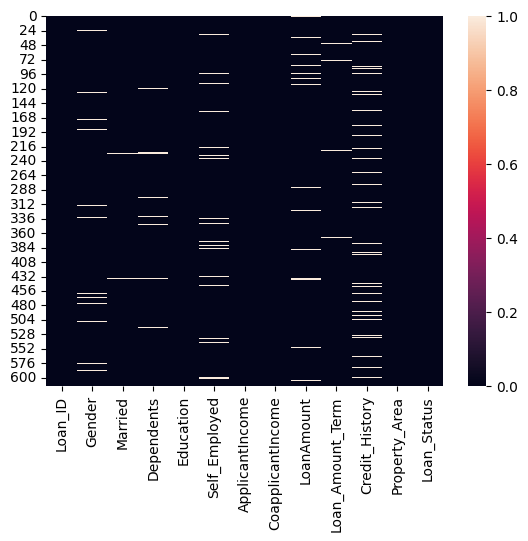

In [126]:
sns.heatmap(df.isnull())
plt.show

In [127]:
# dropping columns with max null values
# df.drop(columns=['Credit_History'], inplace=True)

In [128]:
df.shape

(614, 13)

In [129]:
# removing rows with null values
# df.dropna(inplace=True)

In [130]:
# df.shape

<function matplotlib.pyplot.show(close=None, block=None)>

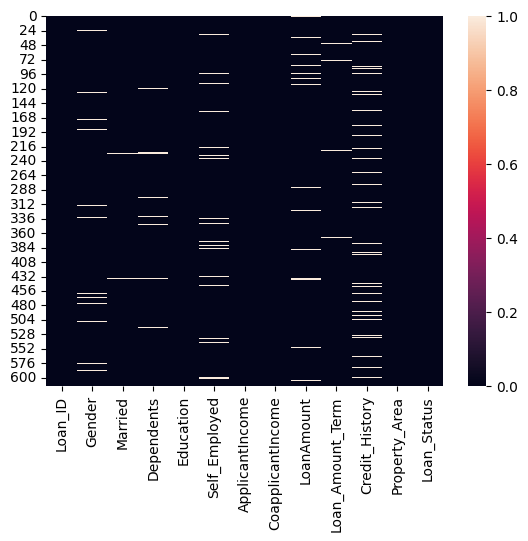

In [131]:
sns.heatmap(df.isnull())
plt.show

In [132]:
# For finding my categorical columns:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [133]:
# Filling categorical columns null values through Loop:
for col in df.select_dtypes(include='object').columns:
  df[col] = df[col].fillna(df[col].mode()[0])

In [134]:
# For finding my numerical columns:
df.select_dtypes(include='number').columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [135]:
# Filling numerical columns null values through Loop:

In [136]:
for col in df.select_dtypes(include='number').columns:
  df[col] = df[col].fillna(df[col].mean())

In [137]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [138]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<Axes: ylabel='ApplicantIncome'>

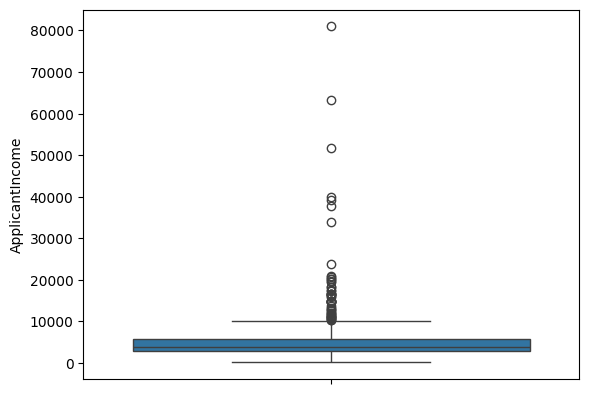

In [139]:
# Viewing Outliers
sns.boxplot(df['ApplicantIncome'])

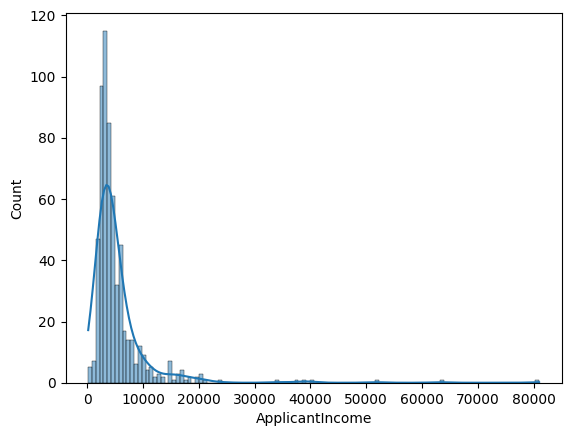

In [140]:
# Viewing Outliers
sns.histplot(df['ApplicantIncome'], kde=True)
plt.show()

In [141]:
# Removing Outlier through Quantile Method
q1 = df['ApplicantIncome'].quantile(0.25)
q3 = df['ApplicantIncome'].quantile(0.75)
iqr= q3-q1
iqr

np.float64(2917.5)

In [142]:
min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)
print(min_range)
print(max_range)

-1498.75
10171.25


In [143]:
df1 = df[df['ApplicantIncome']<=max_range]
df1.shape

(564, 13)

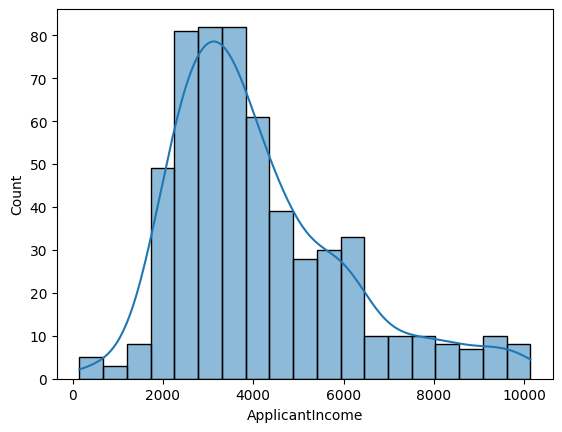

In [144]:
# Viewing Outlier after Quantile Method
sns.histplot(df1['ApplicantIncome'], kde=True)
plt.show()

<Axes: ylabel='CoapplicantIncome'>

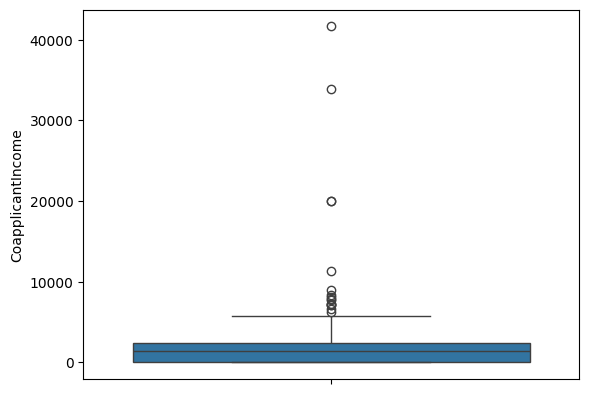

In [145]:
# Viewing Outliers
sns.boxplot(df1['CoapplicantIncome'])

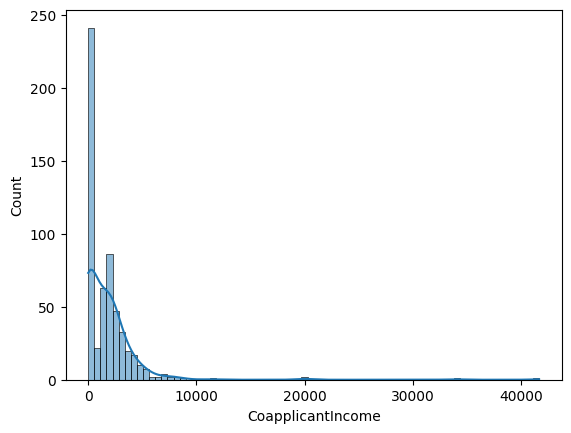

In [146]:
# Viewing Outliers
sns.histplot(df1['CoapplicantIncome'], kde=True)
plt.show()

In [147]:
# Removing Outlier through 3std method
min_range1 = df1['CoapplicantIncome'].mean() - [3 * df1['CoapplicantIncome'].std()]
max_range1 = df1['CoapplicantIncome'].mean() + [3* df1['CoapplicantIncome'].std()]
print(min_range1)
print(max_range1)

[-7245.4028047]
[10629.99117345]


In [148]:
df_final= df1[df1['CoapplicantIncome']<=max_range1[0]]
df_final.shape

(559, 13)

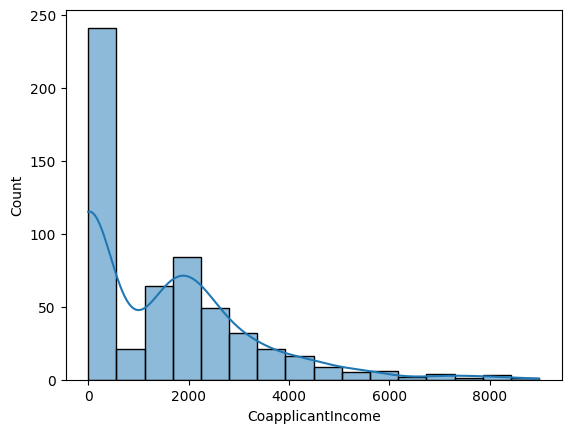

In [149]:
sns.histplot(df_final['CoapplicantIncome'], kde=True)
plt.show()

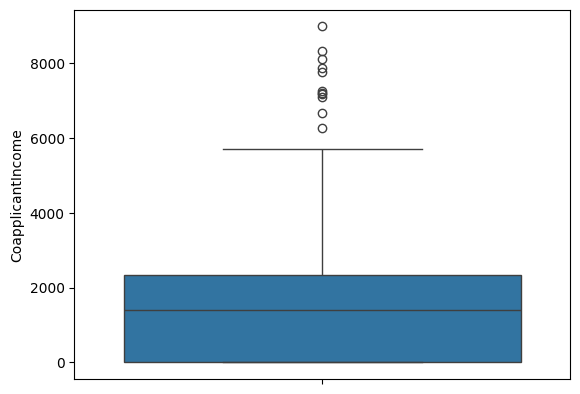

In [150]:
sns.boxplot(df_final['CoapplicantIncome'])
plt.show()

In [151]:
# Dropping Target Column:
x = df_final.drop(columns=['Loan_Status'])
y = df_final['Loan_Status']

In [152]:
# Distributing Data in Categorical and Numerical columns:
cat_cols = x.select_dtypes(include='object').columns
num_cols = x.select_dtypes(include='number').columns
print(cat_cols)
print(num_cols)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [173]:
# Performing OneHotEncoding on Categorical Columns:
encoder = OneHotEncoder(drop='first', sparse_output=False)
x_cat = encoder.fit_transform(x[cat_cols])
x_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [174]:
# Combining Numerical and Categorical Columns:
x_combined = np.hstack([x[num_cols].values, x_cat])
x_combined.shape

(559, 572)

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x_combined, y, test_size=0.2, random_state=42)

In [176]:
# Feature Scaling with Standar Scaler:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled
x_test_scaled

array([[ 0.07028609, -0.43471027, -0.89283581, ...,  2.75611209,
         1.24670996, -0.67178769],
       [-0.45490157, -0.32878039, -0.5574128 , ..., -0.36282995,
         1.24670996, -0.67178769],
       [ 1.99769386,  0.47137918,  0.84018309, ..., -0.36282995,
        -0.80211118,  1.48856553],
       ...,
       [-0.43478142,  0.27208738, -0.42697051, ..., -0.36282995,
        -0.80211118, -0.67178769],
       [-1.06211757,  1.06207289,  0.80291386, ..., -0.36282995,
         1.24670996, -0.67178769],
       [ 0.17501408, -0.87518704, -0.37106668, ..., -0.36282995,
         1.24670996, -0.67178769]])

In [157]:
# Checking for Duplicates:
df_final['Loan_ID'].duplicated().sum()

np.int64(0)

In [158]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            559 non-null    object 
 1   Gender             559 non-null    object 
 2   Married            559 non-null    object 
 3   Dependents         559 non-null    object 
 4   Education          559 non-null    object 
 5   Self_Employed      559 non-null    object 
 6   ApplicantIncome    559 non-null    int64  
 7   CoapplicantIncome  559 non-null    float64
 8   LoanAmount         559 non-null    float64
 9   Loan_Amount_Term   559 non-null    float64
 10  Credit_History     559 non-null    float64
 11  Property_Area      559 non-null    object 
 12  Loan_Status        559 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.1+ KB


In [159]:
# Replacing Data
df_final['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [160]:
df_final['Dependents'].value_counts()

,count
Dependents,
0,333
2,94
1,89
3+,43


In [161]:
df_final['Dependents'].replace('3+', 3, inplace=True)

/tmp/ipython-input-4142892594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Dependents'].replace('3+', 3, inplace=True)
/tmp/ipython-input-4142892594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Dependents'].replace('3+', 3, inplace=True)


In [162]:
# Converting Data Type
df_final['Dependents'] = df_final['Dependents'].astype(int)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            559 non-null    object 
 1   Gender             559 non-null    object 
 2   Married            559 non-null    object 
 3   Dependents         559 non-null    int64  
 4   Education          559 non-null    object 
 5   Self_Employed      559 non-null    object 
 6   ApplicantIncome    559 non-null    int64  
 7   CoapplicantIncome  559 non-null    float64
 8   LoanAmount         559 non-null    float64
 9   Loan_Amount_Term   559 non-null    float64
 10  Credit_History     559 non-null    float64
 11  Property_Area      559 non-null    object 
 12  Loan_Status        559 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 61.1+ KB


/tmp/ipython-input-4063942869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Dependents'] = df_final['Dependents'].astype(int)


In [177]:
model = LogisticRegression(C= 0.1, max_iter= 100, n_jobs= None, penalty= 'l1', solver= 'liblinear', random_state= 4, verbose= 0)
model.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=4, solver='liblinear')

In [178]:
y_pred = model.predict(x_test)

In [179]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
174,N,Y
495,Y,Y
58,Y,Y
270,Y,Y
74,Y,Y
...,...,...
12,Y,Y
406,Y,Y
23,N,Y
414,N,Y


In [180]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred, pos_label='Y'))
print('Recall Score: ', recall_score(y_test, y_pred, pos_label='Y'))
print('F1 Score: ', f1_score(y_test, y_pred, pos_label='Y'))

Accuracy Score:  0.7410714285714286
Precision Score:  0.7410714285714286
Recall Score:  1.0
F1 Score:  0.8512820512820513


In [181]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        29
           Y       0.74      1.00      0.85        83

    accuracy                           0.74       112
   macro avg       0.37      0.50      0.43       112
weighted avg       0.55      0.74      0.63       112

[[ 0 29]
 [ 0 83]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [168]:
# Hyper Parameter Tuning:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['lbfgs', 'liblinear'],
              'max_iter': [100],
              'random_state': [4,5,6],
              'verbose': [0],
              'n_jobs': [None]
              }

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)

Best Parameters:  {'C': 0.1, 'max_iter': 100, 'n_jobs': None, 'penalty': 'l1', 'random_state': 4, 'solver': 'liblinear', 'verbose': 0}
Best Score:  0.8054681647940075


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve